In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools

In [72]:
df_raw = pd.read_csv('personality_datasert.csv')
df_raw

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [73]:
df_raw.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

Categorical:
 - Stage_fear
 - Drained_after_socializing
 - Personality


Numberical: (discrete)
 - Time_spent_Alone: 
 - Social_event_attendance
 - Going_outside
 - Friends_circle_size
 - Post_frequency

### Categorical

In [74]:
def plot_categorical_distribution_grid(df_raw, columns, cols=2):
    rows = (len(columns) + cols - 1) // cols 
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
    axes = axes.flatten()  # Flatten in case it's 2D

    for i, col in enumerate(columns):
        ax = axes[i]
        counts = df_raw[col].value_counts()
        bars = ax.bar(counts.index, counts.values)

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)
            
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xticks(range(len(counts.index)))
        ax.set_xticklabels(counts.index)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [75]:
categorical_cols = ["Stage_fear", "Drained_after_socializing", "Personality"]

In [76]:
# Unique values
for col in categorical_cols:
    print(f"'{col}': {df_raw[col].unique()}")

'Stage_fear': ['No' 'Yes']
'Drained_after_socializing': ['No' 'Yes']
'Personality': ['Extrovert' 'Introvert']


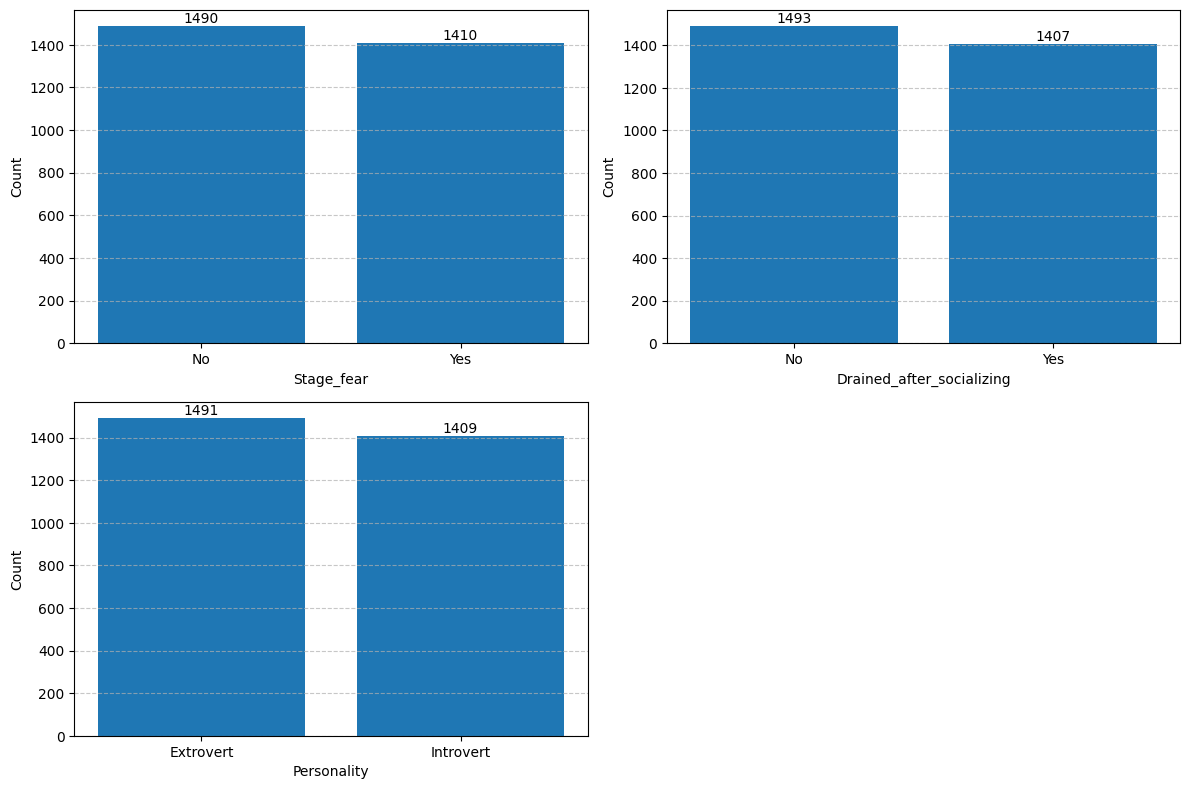

In [77]:
# Values distribution
plot_categorical_distribution_grid(df_raw, categorical_cols, cols=2)

In [78]:
def plot_crosstab_heatmaps(df_raw, pairs):
    fig, axes = plt.subplots(1, len(pairs), figsize=(6 * len(pairs), 5))

    for i, (col1, col2) in enumerate(pairs):
        ctab = pd.crosstab(df_raw[col1], df_raw[col2])
        sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f"{col1} vs {col2}")
        axes[i].set_xlabel(col2)
        axes[i].set_ylabel(col1)

    plt.tight_layout()
    plt.show()

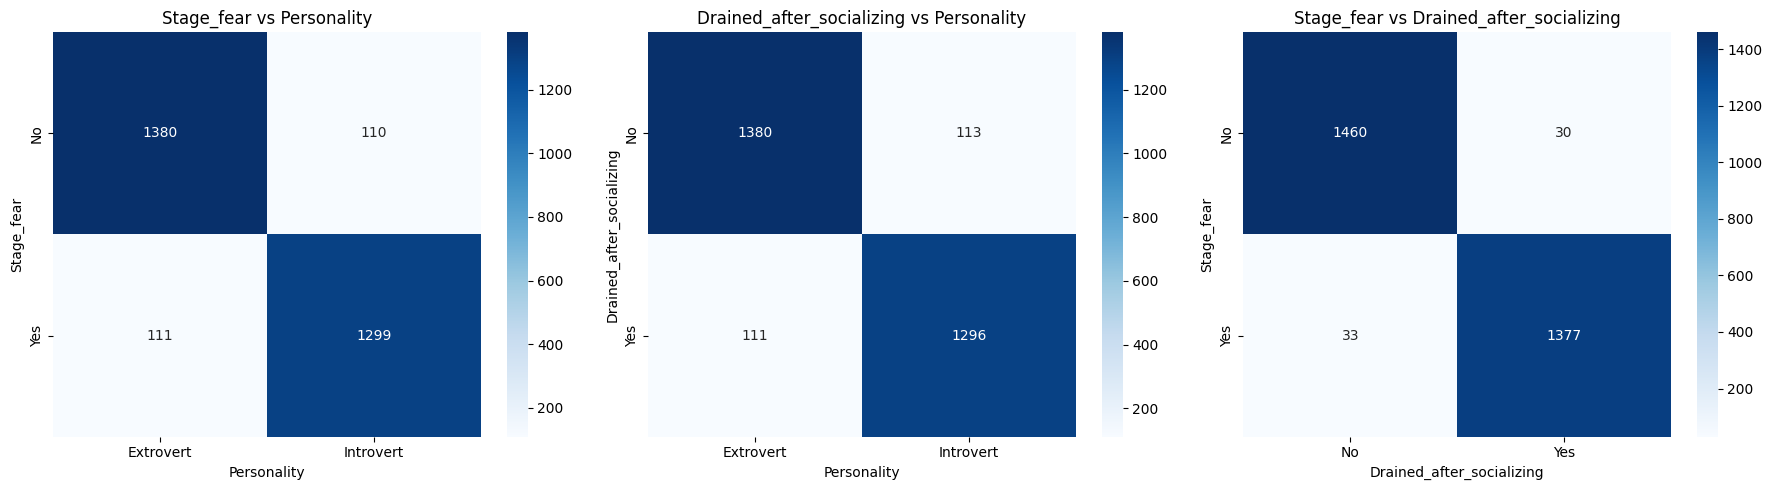

In [79]:
cross_tab_pairs = [
    ("Stage_fear", "Personality"),
    ("Drained_after_socializing", "Personality"),
    ("Stage_fear", "Drained_after_socializing")
]

# Plot so sánh chéo
plot_crosstab_heatmaps(df_raw, cross_tab_pairs)

### Numberical

#### Range

In [80]:
df_raw['Friends_circle_size'].min(), df_raw['Friends_circle_size'].max()

(np.float64(0.0), np.float64(15.0))

#### Trung bình (mean)

là giá trị trung bình

In [81]:
df_raw['Friends_circle_size'].mean()

np.float64(6.268862911795961)

#### Số trung vị (median) 

là giá trị nằm ở giữa một tập hợp dữ liệu đã được sắp xếp theo thứ tự tăng dần hoặc giảm dần. Nó chia tập dữ liệu thành hai phần bằng nhau, với một nửa các giá trị nhỏ hơn và một nửa các giá trị lớn hơn số trung vị. 

In [82]:
df_raw['Friends_circle_size'].median()

np.float64(5.0)

#### Percentile
- Percentile 25th (Q1) là giá trị nằm ở vị trí lớn hơn 25% tập dữ liệu
- Percentile 75th (Q3) là giá trị nằm ở vị trí lớn hơn 75% tập dữ liệu
- Median = Percentile 50th (Q2)


In [83]:
df_raw['Friends_circle_size'].quantile(0.25)

np.float64(3.0)

In [84]:
df_raw['Friends_circle_size'].quantile(0.75)

np.float64(10.0)

##### Visualize

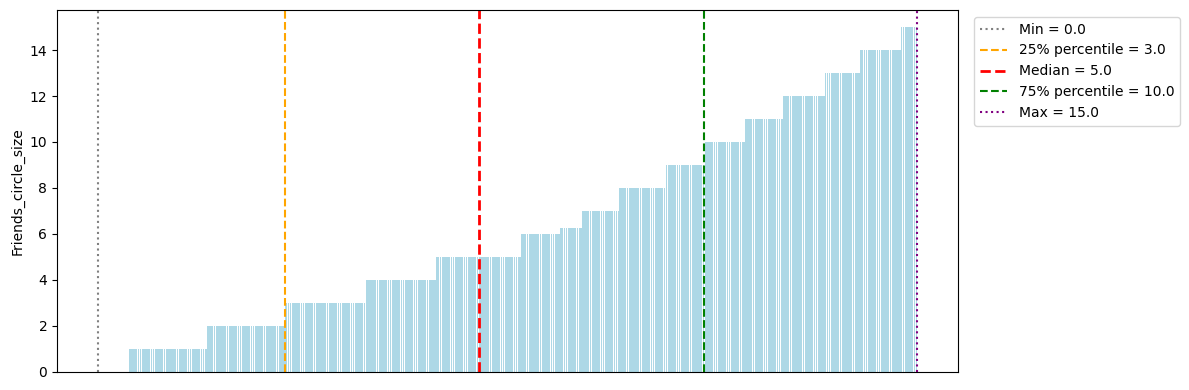

In [85]:

values = df_raw["Friends_circle_size"].sort_values().reset_index(drop=True)

median_val = values.median()
q1 = values.quantile(0.25)
q3 = values.quantile(0.75)
min_val = values.min()
max_val = values.max()

median_indices = values[values == median_val].index.to_list()
median_index_center = sum(median_indices) / len(median_indices)
q1_index = values[values >= q1].index[0]
q3_index = values[values >= q3].index[0]
min_index = values[values == min_val].index[0]
max_index = values[values == max_val].index[-1]

plt.figure(figsize=(12, 4))
plt.bar(range(len(values)), values, color='lightblue')


plt.axvline(min_index, color='gray', linestyle=':', linewidth=1.5, label=f'Min = {min_val}')
plt.axvline(q1_index, color='orange', linestyle='--', linewidth=1.5, label=f'25% percentile = {q1}')
plt.axvline(median_index_center, color='red', linestyle='--', linewidth=2, label=f'Median = {median_val}')
plt.axvline(q3_index, color='green', linestyle='--', linewidth=1.5, label=f'75% percentile = {q3}')
plt.axvline(max_index, color='purple', linestyle=':', linewidth=1.5, label=f'Max = {max_val}')

plt.xlabel("")
plt.ylabel("Friends_circle_size")
plt.xticks([])
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Mode

Giá trị xuất hiện nhiều nhất

In [86]:
df_raw['Friends_circle_size'].mode()

0    5.0
Name: Friends_circle_size, dtype: float64

#### Variance & Standard Deviation

- Phương sai (Variance) đo mức độ phân tán của các giá trị trong tập dữ liệu so với giá trị trung bình.
→ Giá trị phương sai càng lớn, dữ liệu càng phân tán.

- Độ lệch chuẩn (Standard Deviation) là căn bậc hai của phương sai, cho biết mức độ dao động trung bình của các giá trị so với trung bình.

-------------------------------

Với mean $\bar{x}$,

 - Variance:  
$$\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

 - Standard Deviation:  
$$\sigma = \sqrt{\sigma^2}$$


In [87]:
df_raw["Time_spent_Alone"].var()

np.float64(11.841722675389262)

In [88]:
df_raw["Time_spent_Alone"].std()

np.float64(3.4411804188954207)

#### Coefficient of Variation


Hệ số biến thiên (Coefficient of Variation - CV) cho thấy mức độ biến thiên của dữ liệu trong một mẫu tương quan với giá trị trung bình của tổng thể

-----------------------------------

$$ CV = \frac{\sigma}{\bar{x}}  $$

In [89]:
df_raw["Time_spent_Alone"].std() / df_raw["Time_spent_Alone"].mean()

np.float64(0.7637196940003371)

### Tính các thông số TK trên các cột Numberical

In [90]:
df = df_raw.copy()

numeric_cols = [
    "Time_spent_Alone",
    "Social_event_attendance",
    "Going_outside",
    "Friends_circle_size",
    "Post_frequency"
]

summary_stats = {
    "Thông số thống kê": [
        "Mean",
        "Min",
        "25th Percentile",
        "Median",
        "75th Percentile",
        "Max",
        "Mode",
        "Variance",
        "Standard Deviation",
        "Coefficient of Variation"
    ]
}

for col in numeric_cols:
    data = df[col]
    mean_val = data.mean()
    std_val = data.std()
    mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
    variance_val = data.var()
    cv_val = std_val / mean_val if mean_val != 0 else np.nan

    summary_stats[col] = [
        mean_val,
        data.min(),
        data.quantile(0.25),
        data.median(),
        data.quantile(0.75),
        data.max(),
        mode_val,
        variance_val,
        std_val,
        cv_val
    ]

summary_df = pd.DataFrame(summary_stats)

summary_df

,Thông số thống kê,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,Mean,4.505816,3.963354,3.000000,6.268863,3.564727
1,Min,0.000000,0.000000,0.000000,0.000000,0.000000
2,25th Percentile,2.000000,2.000000,1.000000,3.000000,1.000000
3,Median,4.000000,3.963354,3.000000,5.000000,3.000000
4,75th Percentile,7.000000,6.000000,5.000000,10.000000,6.000000
5,Max,11.000000,10.000000,7.000000,15.000000,10.000000
6,Mode,0.000000,2.000000,0.000000,5.000000,2.000000
7,Variance,11.841723,8.251876,4.935495,17.912705,8.372843
8,Standard Deviation,3.441180,2.872608,2.221597,4.232340,2.893587
9,Coefficient of Variation,0.763720,0.724792,0.740532,0.675137,0.811727


## Data visualization

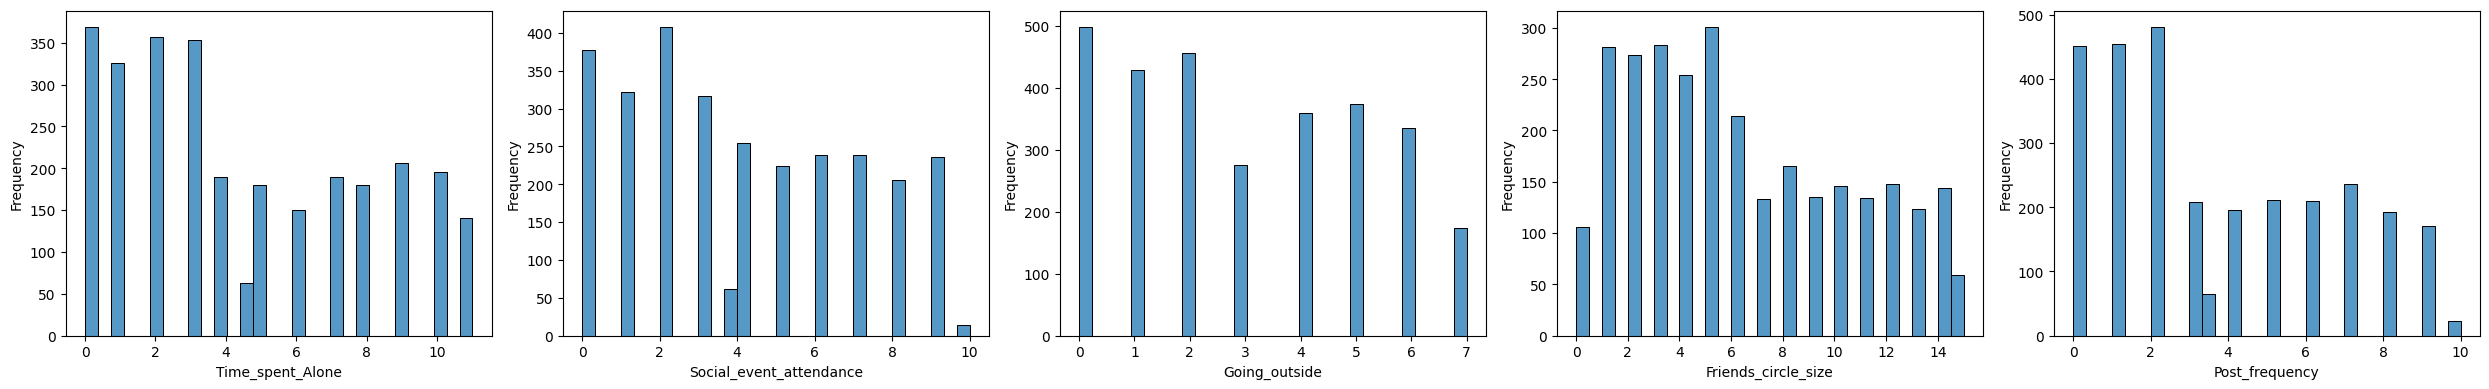

In [109]:
def plot_histogram(df, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(5 * len(columns), 4))
    
    if len(columns) == 1:
        axes = [axes]  # Ensure axes is iterable
    
    for i, col in enumerate(columns):
        ax = axes[i]
        sns.histplot(df[col], bins=30, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
    
    plt.tight_layout()
    plt.show()

plot_histogram(df, numeric_cols)

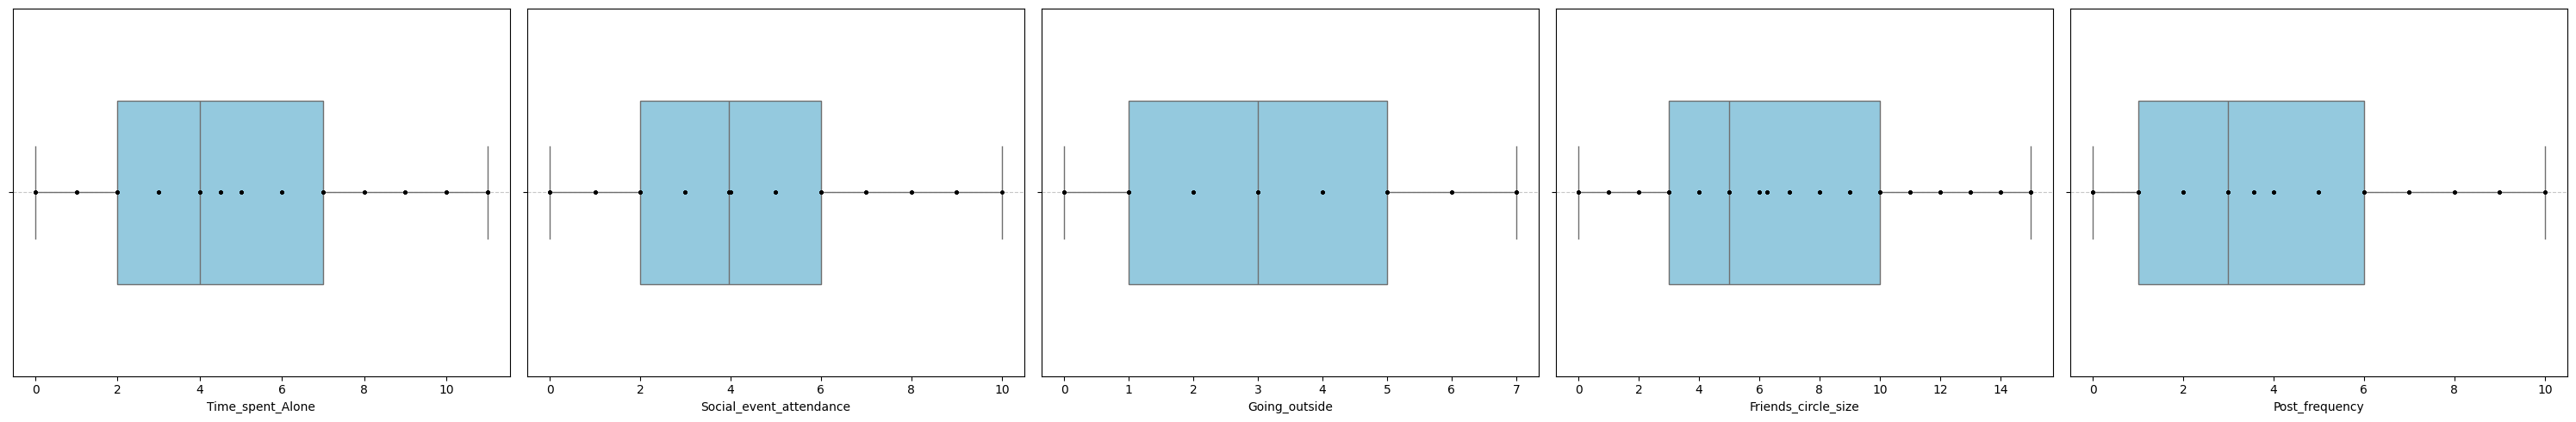

In [117]:
def plot_boxplots_with_centered_points(df_raw, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(6 * len(columns), 5))

    for i, col in enumerate(columns):
        sns.boxplot(x=df_raw[col], ax=axes[i], color='skyblue', width=0.5)
        sns.stripplot(x=df_raw[col], ax=axes[i], color='black', alpha=0.3, jitter=False, size=3)
        axes[i].set_xlabel(col)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

boxplot_cols = [
    "Time_spent_Alone",
    "Social_event_attendance",
    "Going_outside",
    "Friends_circle_size",
    "Post_frequency"
]

plot_boxplots_with_centered_points(df_raw, boxplot_cols)


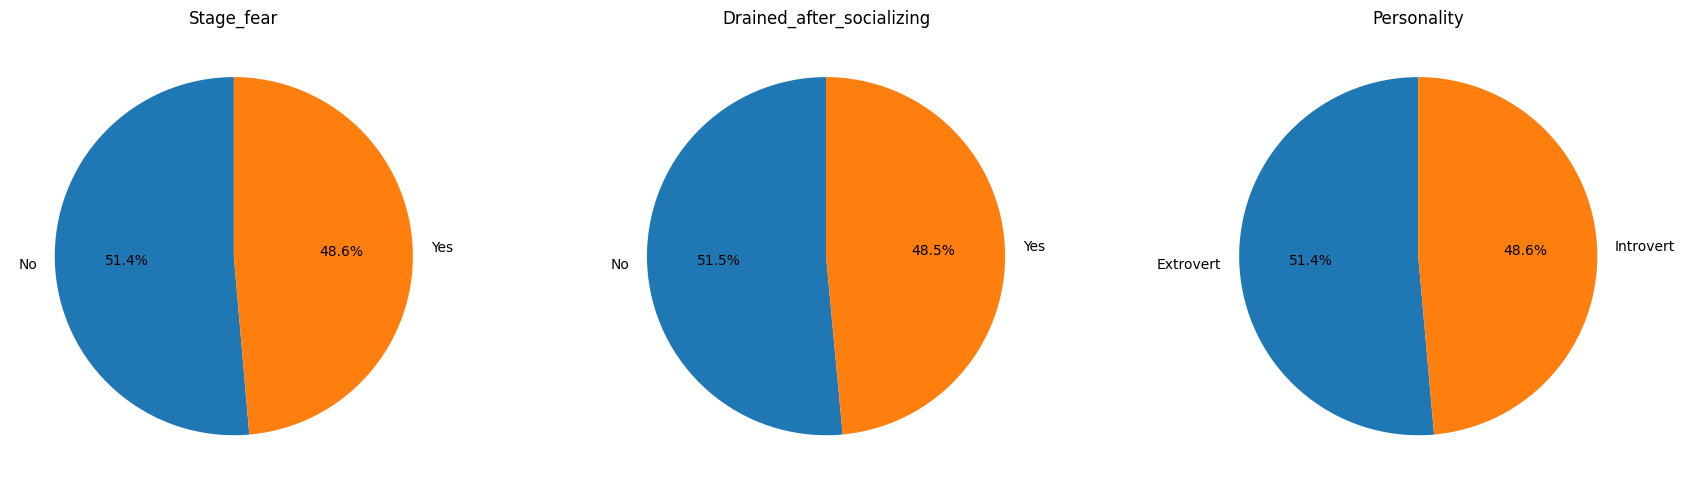

In [95]:
def plot_piecharts(df_raw, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(6 * len(columns), 5))

    for i, col in enumerate(columns):
        counts = df_raw[col].value_counts()
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(col)

    plt.tight_layout()
    plt.show()

piechart_cols = [
    "Stage_fear",
    "Drained_after_socializing",
    "Personality"
]

plot_piecharts(df_raw, piechart_cols)

In [129]:
def plot_scatter_pairs(df, columns, hue=None, corr_threshold=0.3):
    pairs = []
    
    for x, y in itertools.combinations(columns, 2):
        corr = df[[x, y]].corr().iloc[0, 1]
        if abs(corr) >= corr_threshold:
            pairs.append((x, y, corr))

    if not pairs:
        print("No column pairs meet the correlation threshold.")
        return

    cols = 2
    rows = math.ceil(len(pairs) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows))
    axes = axes.flatten()

    for i, (x_col, y_col, corr) in enumerate(pairs):
        sns.scatterplot(data=df, x=x_col, y=y_col, ax=axes[i], hue=hue, alpha=0.6)
        axes[i].set_title(f"{x_col} vs {y_col} (r = {corr:.2f})")
        axes[i].grid(True, linestyle='--', alpha=0.5)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

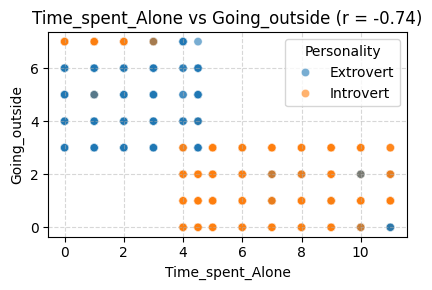

In [130]:
plot_scatter_pairs(df, ['Time_spent_Alone', 'Going_outside'], hue='Personality')


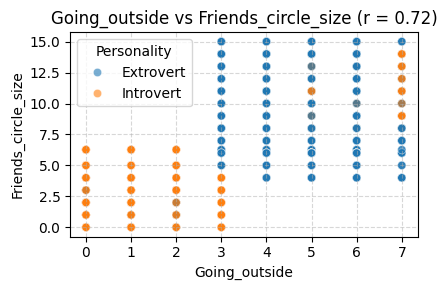

In [131]:
plot_scatter_pairs(df, ['Going_outside', 'Friends_circle_size'], hue='Personality')